<a href="https://colab.research.google.com/github/MinYeongPark/AI_practice/blob/main/221017%EC%8B%A4%EC%8A%B5_4_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EB%AC%B8%EC%A0%9C%EC%A0%90(%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

### 기울기 소실/폭발 문제 확인 : Vanishing/Exploding Gradient

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # sigmoid 함수의 수식

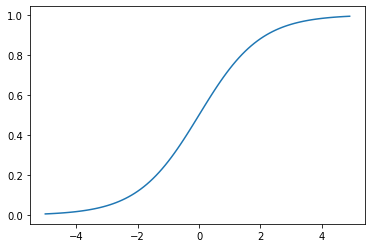

In [4]:
x = np.arange(-5.0, 5, 0.1) # -5.0 ~ 5.0까지 0.1씩 증가
y = sigmoid(x)
plt.plot(x,y) # 무조건 값이 0과 1 사이로 제한이 되어버림

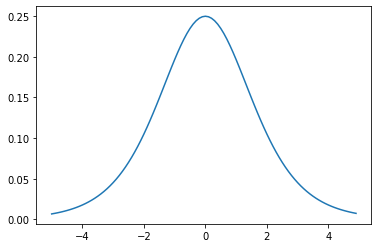

In [5]:
diff_y = sigmoid(x) * (1-sigmoid(x))
plt.plot(x, diff_y) # 미분할 경우 최대값이 0.25에 불과
# 미분한 값이 0 ~ 0.25 사이

### 기울기 소실/폭발 : 활성화 함수를 변경하여 해결

In [6]:
### 가중치가 업데이트 되었다는 건 loss도 같이 줄어든다는 뜻
# -> 무조건은 아님, local minima와 global minima 
# -> 근데 이렇게 간단한 형태의 데이터와 모델에서 봤을 때, 가중치가 업데이트 되면 loss도 같이 업데이트 될 확률이 높음
# -> 아직 과적합은 고려하지 않고 진행 

In [7]:
torch.manual_seed(1017)

inputs = torch.randn(2, 2) # 2행 2열 짜리 데이터

sigmoid_network = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

sigmoid_network[0].weight

Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True)

In [8]:
torch.manual_seed(777)

targets = torch.randn(2) # 각 행마다 해당하는 label을 생성

In [9]:
# 가중치 업데이트에 필요한 요소들 설정 : 뒤에가서 하나씩 살펴볼 예정, 지금은 이런게 있어야 업데이트가 되는구나 정도로 이해
learning_rate = 0.001 # 학습률
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(sigmoid_network.parameters(), lr=learning_rate)

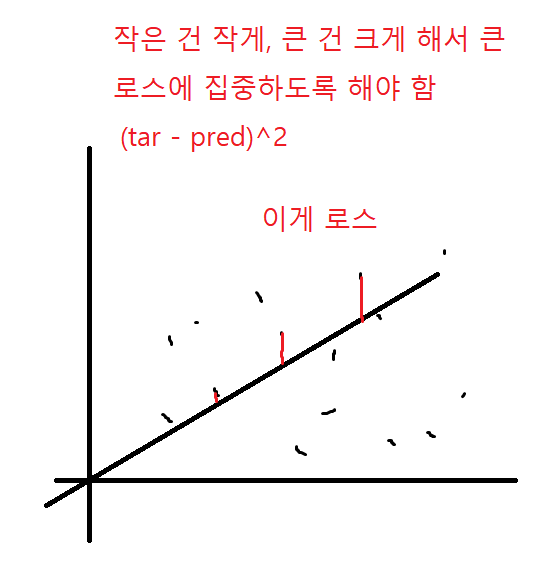

In [10]:
for epoch in range(0, 100) : # 에폭 : 한번 학습하는 것 - 총 100번 돌아가게 하겠다.
    print('*** Start {} Epoch'.format(epoch+1)) # epoch마다 시작되는 걸 보겠다
    sigmoid_network.train() # 학습모드로 설정

    pred = sigmoid_network(inputs) # 예측값 할당

    loss = criterion(targets, pred) # loss값 계산
    print('Loss : {}'.format(loss)) # loss값을 에포크마다 보겠다.
    
    optimizer.zero_grad() # # 기울기가 누적되는 것을 방지하기 위해 기울기를 0으로 초기화 - 안에 있는 것들을 다 0으로 만들겠다는 메서드.
    loss.backward() # loss 값을 통해서 편미분
    optimizer.step() # 가중치를 한 스텝 업데이트

    print('Weight : {}'.format(sigmoid_network[0].weight), '\n') # 가중치를 epoch마다 보겠다

*** Start 1 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0420, -0.3399]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.9606472253799438
Weight : Parameter containing:
tensor([[-0.0410, -0.3389]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.9596229791641235
Weight : Parameter containing:
tensor([[-0.0400, -0.3379]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.958599328994751
Weight : Parameter containing:
tensor([[-0.0390, -0.3369]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.9575760364532471
Weight : Parameter containing:
tensor([[-0.0380, -0.3359]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.9565534591674805


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Weight : Parameter containing:
tensor([[-0.0370, -0.3349]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.9555312991142273
Weight : Parameter containing:
tensor([[-0.0360, -0.3339]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.9545097947120667
Weight : Parameter containing:
tensor([[-0.0350, -0.3329]], requires_grad=True) 

*** Start 9 Epoch
Loss : 0.9534887671470642
Weight : Parameter containing:
tensor([[-0.0340, -0.3319]], requires_grad=True) 

*** Start 10 Epoch
Loss : 0.9524683952331543
Weight : Parameter containing:
tensor([[-0.0330, -0.3309]], requires_grad=True) 

*** Start 11 Epoch
Loss : 0.9514485597610474
Weight : Parameter containing:
tensor([[-0.0320, -0.3299]], requires_grad=True) 

*** Start 12 Epoch
Loss : 0.9504291415214539
Weight : Parameter containing:
tensor([[-0.0310, -0.3289]], requires_grad=True) 

*** Start 13 Epoch
Loss : 0.9494105577468872
Weight : Parameter containing:
tensor([[-0.0300, -0.3279]], requires_grad=True) 

*** Start 14 Epoch
Loss : 0.9483

In [11]:
#relu 쓰는 것
torch.manual_seed(1017)

inputs = torch.randn(2, 2) # 2행 2열 짜리 데이터

relu_network = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU()
)

In [12]:
learning_rate = 0.001 # 학습률
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(relu_network.parameters(), lr=learning_rate)

In [13]:
# 결과를 확인하면, sigmoid를 사용한 모델에 비해서 loss가 현저하게 줄어든 것을 확인할 수 있음
# -> 가중치가 잘 업데이트 되고 있다는 뜻

for epoch in range(0, 100) : # 에폭 : 한번 학습하는 것 - 총 100번 돌아가게 하겠다.
    print('*** Start {} Epoch'.format(epoch+1)) # epoch마다 시작되는 걸 보겠다
    relu_network.train() # 학습모드로 설정

    pred = relu_network(inputs) # 예측값 할당

    loss = criterion(targets, pred) # loss값 계산
    print('Loss : {}'.format(loss)) # loss값을 에포크마다 보겠다.
    
    optimizer.zero_grad() # 기울기가 누적이 되는 걸 방지 - 안에 있는 것들을 다 0으로 만들겠다는 메서드.
    loss.backward() # loss 값을 통해서 편미분
    optimizer.step() # 가중치를 한 스텝 업데이트

    print('Weight : {}'.format(relu_network[0].weight), '\n') # 가중치를 epoch마다 보겠다

*** Start 1 Epoch
Loss : 0.36954379081726074
Weight : Parameter containing:
tensor([[-0.0420, -0.3399]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.3676071763038635
Weight : Parameter containing:
tensor([[-0.0410, -0.3389]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.36567872762680054
Weight : Parameter containing:
tensor([[-0.0400, -0.3379]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.36375853419303894
Weight : Parameter containing:
tensor([[-0.0390, -0.3369]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.36184680461883545
Weight : Parameter containing:
tensor([[-0.0380, -0.3359]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.3599436283111572
Weight : Parameter containing:
tensor([[-0.0370, -0.3349]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.3580492436885834
Weight : Parameter containing:
tensor([[-0.0360, -0.3339]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.3561636209487915
Weight : Parameter containing:
tensor([[-0.0350, -0.3329]], requires_g

### 기울기 소실/폭발 : 학습률을 변경하여 해결

In [16]:
# 모델은 활성화 함수로 sigmoid를 사용한 모델로 고정

torch.manual_seed(1017)

inputs = torch.randn(2, 2) # 2행 2열 짜리 데이터

sigmoid_network = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [31]:
learning_rate = 0.01 # 학습률 # 기존 학습률에 10배를 적용
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(sigmoid_network.parameters(), lr=learning_rate)

In [17]:
### 다른 조건은 그대로 두고 학습률만 바꿨는데 loss가 많이 내려간 것을 확인할 수 있음

for epoch in range(0, 100) : # 에폭 : 한번 학습하는 것 - 총 100번 돌아가게 하겠다.
    print('*** Start {} Epoch'.format(epoch+1)) # epoch마다 시작되는 걸 보겠다
    sigmoid_network.train() # 학습모드로 설정

    pred = sigmoid_network(inputs) # 예측값 할당

    loss = criterion(targets, pred) # loss값 계산
    print('Loss : {}'.format(loss)) # loss값을 에포크마다 보겠다.
    
    optimizer.zero_grad() # 기울기가 누적이 되는 걸 방지 - 안에 있는 것들을 다 0으로 만들겠다는 메서드.
    loss.backward() # loss 값을 통해서 편미분
    optimizer.step() # 가중치를 한 스텝 업데이트

    print('Weight : {}'.format(sigmoid_network[0].weight), '\n') # 가중치를 epoch마다 보겠다

    # loss가 절반으로 확 떨어짐.

*** Start 1 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 2 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 3 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 4 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 5 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 6 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 7 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=True) 

*** Start 8 Epoch
Loss : 0.9616718888282776
Weight : Parameter containing:
tensor([[-0.0430, -0.3409]], requires_grad=